In [44]:
# student Id number: 201680340
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV


# the imported library below and the corresponding code is used to filter warnings for the purpose of increasing the readabiltiy of the output. 

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


# the dataset is opened as a dataframe 
# the columns of the dataset that containing continuous data or discrete data are assigned to the "df_continuous" and "df_discrete" variables accordingly.

df = (pd.read_csv('dataset_assignment1-3.csv')).copy()
df_continuous = df.drop(columns=['class'])
df_discrete = df['class']


In [45]:
# the number of samples for each class within the "class columns" are calculated using a the pandas "value_counts" function.
# The count for each class is acessed through indexing the positions within the pandas series. 

n_of_class_0 = df['class'].value_counts()[0]
n_of_class_1= df['class'].value_counts()[1]
print("number of samples of class 0:", n_of_class_0)
print("number of samples of class 1:", n_of_class_1)

number of samples of class 0: 459
number of samples of class 1: 241


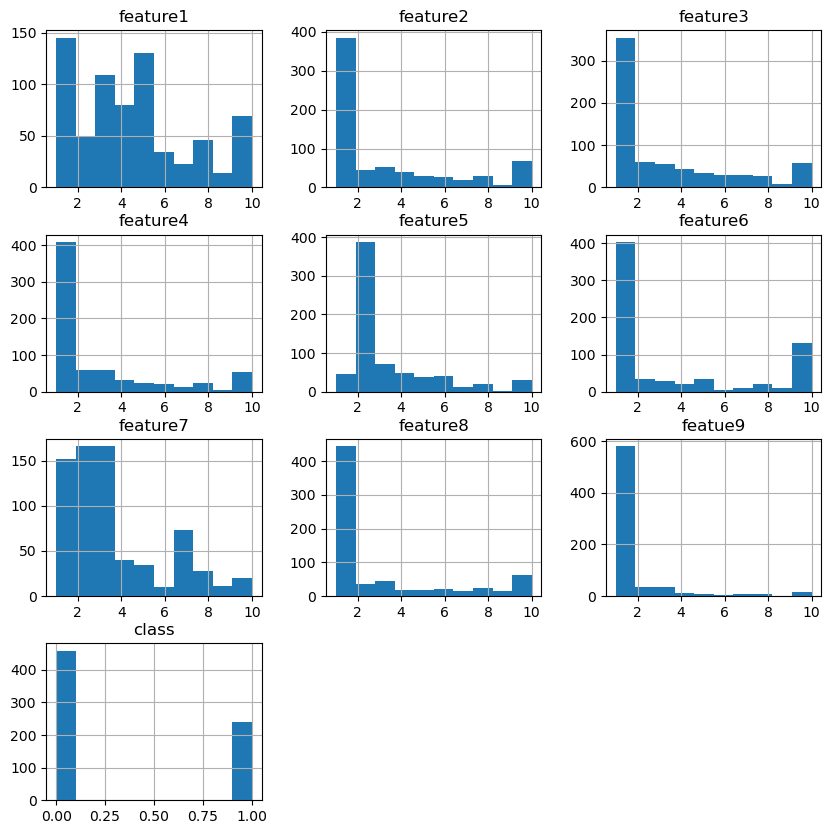

In [46]:
# the Pandas histrogram method is used to produce a histogram for each feature and the class label.

hist = df.hist(figsize=[10, 10])
plt.show()

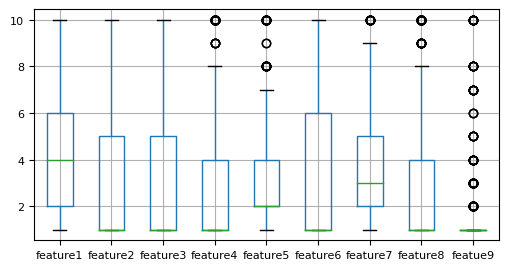

In [47]:
# the code below produces a graph containing a boxplot for each feature. 

box_plot_1 = df.boxplot(column=['feature1', 'feature2' ,  'feature3','feature4', 'feature5','feature6', 'feature7' ,  'feature8','featue9'], figsize=[6,3], fontsize=8)                       
plt.show()


<AxesSubplot:>

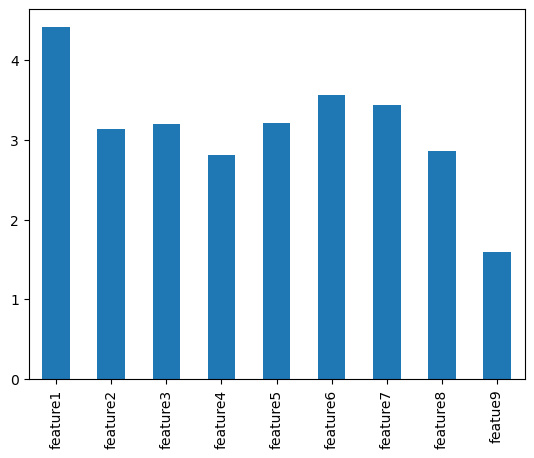

In [48]:
# The code below produces a simple bbar graph comparing the mean values comparing mean values of each feature 
df_continuous.mean().plot(kind='bar')


In [49]:
# the code below used the Pandas describe method to output the descrptive statistics for all features per  class.


# print(df.describe())

class_0_mask = df['class'] == 0
class_1_mask = df['class'] == 1
class_0= df[class_0_mask]
class_1 = df[class_1_mask]

print("class 0, descriptive statistics:")
print(class_0.describe())

print("class 1, descriptive statistics:")
print(class_1.describe())






class 0, descriptive statistics:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8     featue9  class  
count  459.000000  459.000000  459.000000  459.0  
mean     2.102397    1.289760    1.063181    0.0  
std      1.079976    1.057787    0.501456    0.0  
min      1.000000    1.000000    

In [50]:
# the code below seperates the complete dataset, held in the dataframe, into its X and Y components. X's are the nine feature variables per data object
# whilst the Y is the corresponding class label. 

x = df.drop(columns=['class'])
y = df['class']

# the x and y variables are then further split into test and train sets to the ration of 75%, 25%, using the scikit-learn "train_test_split" method. The randomoness is fixed by setting the random 
# state to an arbitrary value of 1. 

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1)

In [51]:
# KNN: model training and hyperparameter tuning

# inside the for loop, the K-fold Cross validation is implemented through the scikit-learn Gridsearch function. 
# a list of possible parameter values for each hyperparameter is assigned to the 'parameters' variable.
# for all possible compbinations of hyperparameter values, the resultant KNN model is trained.

#the best_estimator attribute returns the hyperparameter configuration of a KNN model that produces the best peformance
# for a specific evaluation metric. 


# each evaluation metric, refered to as "scor_varb" in the code below, is placed in a list in the first line and then iterated through
# via the for loop. The output printed is the best hyperparameter configuration for eaach evualtion metric. 


for scor_varb in ('accuracy', 'f1','precision', 'recall'):
    parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'p': [1,2], 'weights': ['uniform', 'distance']}
    model = KNeighborsClassifier()
    clf = GridSearchCV(model, parameters, scoring= scor_varb, cv= 10)
    # sctkit learn says that for binary estimators, it uses "stratified k fold"
    clf.fit(train_x,train_y)
    best_model = clf.best_estimator_
    optimal_parameters = best_model.get_params()
    print(scor_varb, optimal_parameters)
    tuned_model = KNeighborsClassifier(** optimal_parameters)

accuracy {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
f1 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
precision {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
recall {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [52]:
def Metrics (tuned_model,train_x, train_y, test_x, test_y):
    tuned_model.fit(train_x, train_y)
    y_preds = tuned_model.predict(test_x)
    y_true = test_y
    cfm = confusion_matrix(y_true, y_preds)
    disp =  ConfusionMatrixDisplay(cfm)
    disp.plot()
    plt.show()
    print('Precision: %.3f' % precision_score(y_true, y_preds))
    print('Recall: %.3f' % recall_score(y_true, y_preds))
    print('F1: %.3f' % f1_score(y_true, y_preds))
    print('Accuracy: %.3f' % accuracy_score(y_true, y_preds))

optimal tuned model parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
KNN confusion matrix and evaluation metrics:


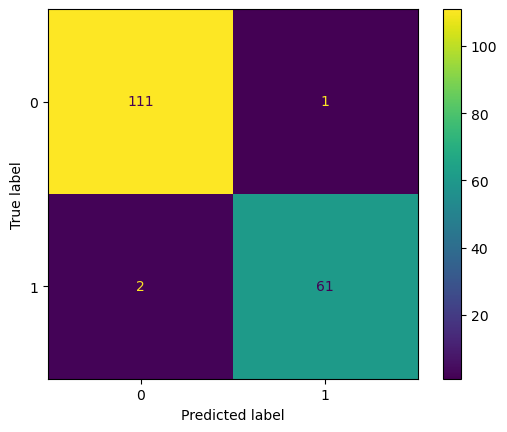

Precision: 0.984
Recall: 0.968
F1: 0.976
Accuracy: 0.983
None


In [53]:
# the chosen KNN hyperparameters balacing the differnet metrics (see report for explanation) is assigned to the 'tuned model' variable. This is placed into 
# the "Metrics" function defined earlier to give the output of a confusion matrix, preicison, recall and accuracy. 

tuned_model = KNeighborsClassifier(n_neighbors=3, p =1, weights='uniform')
print("optimal tuned model parameters:", tuned_model.get_params())
print("KNN confusion matrix and evaluation metrics:")
print(Metrics(tuned_model, train_x, train_y, test_x, test_y))

In [54]:
# Decision tree: model training and hyperparameter tuning

# inside the for loop, the K-fold Cross validation is implemented through the scikit-learn Gridsearch function. 
# a list of possible parameter values for each hyperparameter is assigned to the 'parameters' variable.
# for all possible compbinations of hyperparameter values, the resultant Decision tree model is trained.

#the best_estimator attribute returns the hyperparameter configuration of the decision tree model that produces the best peformance
# for a specific evaluation metric. 


# each evaluation metric, refered to as "scor_varb" in the code below, is placed in a list in the first line and then iterated through
# via the for loop. The output printed is the best hyperparameter configuration for eaach evaluation metric. 




for scor_varb in ('accuracy', 'f1', 'precision', 'recall',):
    parameters = {'criterion':['entropy', 'gini'], 'min_samples_split':[2,3,4,5], 'min_samples_leaf':[1,2,3,4,5], 'max_leaf_nodes':[2,3,4,5,6,7,8,9,10,11,12]}
    model = DecisionTreeClassifier(random_state=1)
    clf = GridSearchCV(model, parameters, scoring= scor_varb, cv= 10)
    clf.fit(train_x,train_y)
    best_model = clf.best_estimator_
    optimal_parameters =  best_model.get_params()
    print(scor_varb,optimal_parameters)


accuracy {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 12, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
f1 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 12, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
precision {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
recall {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 12, 'min_impurity

In [55]:
# the chosen Decision tree hyperparameters balacing the differnet metrics (see report for explanation) is assigned to the 'tuned model' variable. This is placed into 
# the "Metrics" function defined earlier to give the output of a confusion matrix, preicison, recall and accuracy. 


tuned_model = DecisionTreeClassifier(max_leaf_nodes=12, min_samples_leaf=2, min_samples_split= 2, random_state=1)
print("optimal tuned model parameters:", tuned_model.get_params())
print("Decisiton tree confusion matrix and evaluation metrics":)
print(Metrics(tuned_model, train_x, train_y, test_x, test_y))

SyntaxError: invalid syntax (1763803447.py, line 7)

In [ ]:
# Support vector machine: model training and hyperparameter tuning

# inside the for loop, the K-fold Cross validation is implemented through the scikit-learn Gridsearch function. 
# a list of possible parameter values for each hyperparameter is assigned to the 'parameters' variable.
# for all possible compbinations of hyperparameter values, the resultant SVM models are trained.

# the best_estimator attribute returns the hyperparameter configuration of the SVM model that produces the best peformance
# for a specific evaluation metric. 

# each evaluation metric, refered to as "scor_varb" in the code below, is placed in a list in the first line and then iterated through
# via the for loop. The output printed is the best hyperparameter configuration for each evaluation metric. 



for scor_varb in ('accuracy', 'f1', 'recall', 'precision'):
    parameters = {'C':[1,0.5, 0.25, 0.15], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[1,2,3,4,5]}
    model = svm.SVC(random_state=1)
    clf = GridSearchCV(model, parameters, scoring= scor_varb, cv=5)
    clf.fit(train_x, train_y)
    best_model = clf.best_estimator_
    optimal_parameters = best_model.get_params()
    print(scor_varb, optimal_parameters)
   

accuracy {'C': 0.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
f1 {'C': 0.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
recall {'C': 0.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
precision {'C': 0.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 5, 'gamma

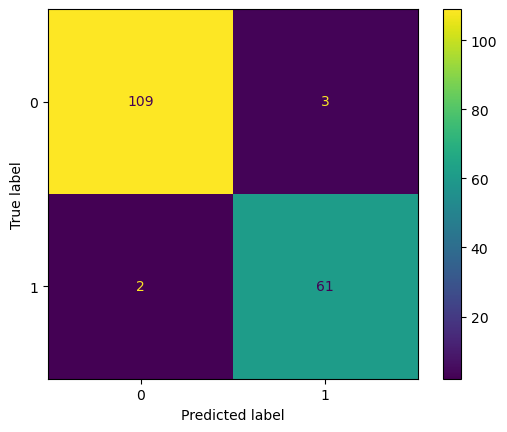

Precision: 0.953
Recall: 0.968
F1: 0.961
Accuracy: 0.971
None


In [ ]:
# the chosen SVM hyperparameters balacing the differnet metrics (see report for explanation) is assigned to the 'tuned model' variable. This is placed into 
# the "Metrics" function defined earlier to give the output of a confusion matrix, preicison, recall and accuracy. 

tuned_model = svm.SVC(C = 0.5, kernel= 'rbf', degree=1, random_state=1)
print("optimal tuned model parameters:", tuned_model.get_params())
print("SVM confusion matrix and evaluation metrics":)
print(Metrics(tuned_model, train_x, train_y, test_x, test_y))